Usage:
    1. Download ranzcr-clip-catheter-line-classification.zip to your PC.
    2. Copy and paste below code to your local python code and run it.

Environment:
    * Python 3.8
    * matplotlib 3.3.4
    * Pandas 1.1.3
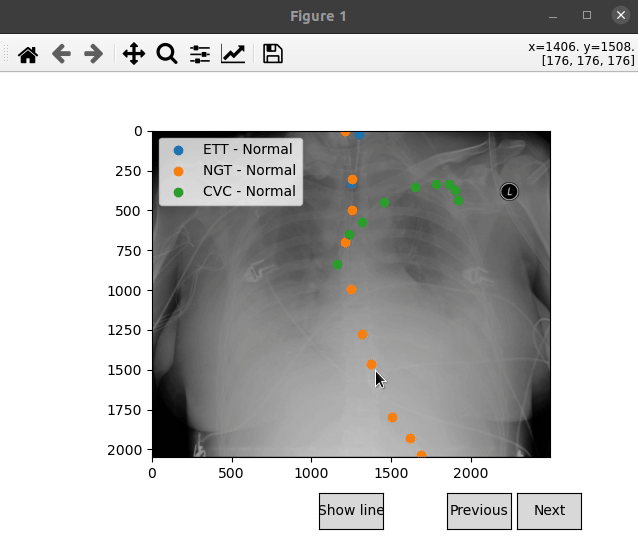

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
import cv2 as cv
import pandas as pd
from matplotlib.widgets import CheckButtons
import ast

# Load annotation.
annot_dir = "../input/ranzcr-clip-catheter-line-classification/train_annotations.csv"
df_annot = pd.read_csv(annot_dir)

# Load every image paths.
folder = "../input/ranzcr-clip-catheter-line-classification/train"
img_path_l = [os.path.join(folder, name) for name in os.listdir(folder)]

# View image has annotation.
annot_uid_l = list(df_annot["StudyInstanceUID"].unique())
img_path_l = [
    path
    for path in img_path_l
    if os.path.splitext(
        os.path.basename(path))[0] in annot_uid_l 
]

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.2)
plt.subplots_adjust(left=0.2)

class Line(object):
    lines = []
    def set_lines(self, lines):
        self.lines = lines
    
    def toggle_visibility(self, event):
        for l in self.lines:
            l.set_visible(not l.get_visible())

line_ins = Line()

class Index(object):
    ind = 0

    def next(self, event):
        self.ind += 1
        self.show_image(self.ind)

    def prev(self, event):
        self.ind -= 1
        self.show_image(self.ind)
    
    def show_image(self, ind):
        ax.clear()
        img_path = img_path_l[ind]
        bname = os.path.basename(img_path)
        uid, _ = os.path.splitext(bname)
        df_img_annot = df_annot[
            df_annot["StudyInstanceUID"] == uid]
        print(df_img_annot["label"])
        img = cv.imread(cv.samples.findFile(img_path))
        ax.imshow(img)
        layer_l = []
        for i,r in df_img_annot.iterrows():
            data = np.array(ast.literal_eval(r["data"]))
            l = ax.scatter(data[:, 0], data[:, 1], label=r["label"])
            layer_l.append(l)
        line_ins.set_lines(layer_l)
        ax.legend()

callback = Index()
axprev = plt.axes([0.7, 0.05, 0.1, 0.075])
axnext = plt.axes([0.81, 0.05, 0.1, 0.075])
bnext = Button(axnext, 'Next')
bnext.on_clicked(callback.next)
bprev = Button(axprev, 'Previous')
bprev.on_clicked(callback.prev)

ax_line = plt.axes([0.5, 0.05, 0.1, 0.075])
b_line = Button(ax_line, 'Show line')
b_line.on_clicked(line_ins.toggle_visibility)

callback.show_image(0)
plt.show()
